In [1]:
#Let's import the required packages first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

In [2]:
#Let's load the data
df = pd.read_csv("E:\Technolabs\cleaned_final.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
# Let's check the average portion of the response variable
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

#### We can see 75-80% of data lies on Negative class and rest is Positive class, So there's a Data-Imbalance 

In [6]:
# Let's import the model as sklearn
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()

In [7]:
my_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
#hyperParameters
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

##### For illustraion let's take a samples from our data and Perform Logistic Regression on it

In [10]:
X = df['EDUCATION'][0:10].values.reshape(-1,1) # taking first 10 samples of that column
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [11]:
Y = df['default payment next month'][0:10].values
Y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
# Let's just fit the data in it
my_new_lr.fit(X,Y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# Let's make prediction on new unseen data
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)

In [14]:
#Predict on it
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Linear Regression on synthetic data

In [15]:
# Let's Take a synthetic data and work on it
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0,size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

#### To compute the Y = mX+b+N(mu,std)

In [16]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope*X+np.random.normal(loc=0.0,scale=1.0,size=(1000,))+intercept

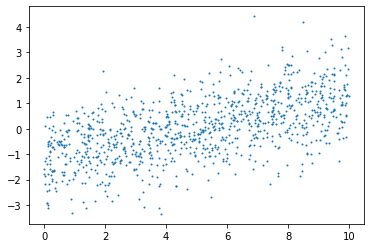

In [17]:
# Let's visualize this using matplotlib
plt.scatter(X,y,s=1)

### Let's perform Linear Regression on synthetic data

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lin_reg.fit(X.reshape(-1,1),y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[0.24002588]
-1.1612566002825888


the values above close to the parameters that we have set earlier

In [20]:
y_pred = lin_reg.predict(X.reshape(-1,1))

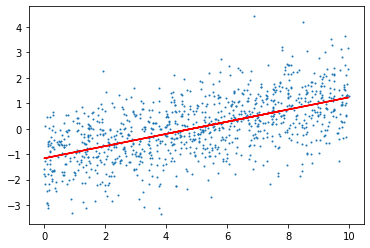

In [21]:
# Let's visualize this 
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

### Splitting the data in training and testing set

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1),df['default payment next month'].values,test_size=0.2,random_state=24)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [24]:
np.mean(y_train)

0.223102526838873

In [25]:
np.mean(y_test)

0.21657603600225014

#### we can see that fractions are almost equal, that 's good sign of the data

In [26]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [27]:
example_lr.fit(X_train,y_train)
y_pred = example_lr.predict(X_test)

In [28]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# Accuracy
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

This indicates the model is correct 78% of the time

In [30]:
# We have alternate way of calculating the accuracy
example_lr.score(X_test,y_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7834239639977498

#### True Positive Rate ,False Positive Rate and Confusion Matrix

#True positive Rate
TPR = TP/P ; # P = positive class;
FNR =FN/P 

TPR+FNR = 1

TNR = TN/N
FPR = FP/N

TNR+FNR = 1

#### Calculating the True and False Positive and Negative Rates and Confusion Matrix 

In [33]:
P = sum(y_test)
P

1155

In [34]:
TP = ((y_test==1) & (y_pred==1))
TP

array([False, False, False, ..., False, False, False])

In [35]:
TPR = TP/P
TPR

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
# similarly for FNR
FN = ((y_test==1) & (y_pred==0))
FN

array([False, False, False, ..., False, False,  True])

In [38]:
FNR = FN/P
FNR

array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
       0.0008658])

In [41]:
print('The True Positive rate is {} and the false Negative rate is {}'.format(TPR, FNR))

The True Positive rate is [0. 0. 0. ... 0. 0. 0.] and the false Negative rate is [0.        0.        0.        ... 0.        0.        0.0008658]


In [40]:
# LEt's find TNR and FPR
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The True Negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The True Negative rate is 1.0 and the false positive rate is 0.0


In [42]:
# Creating a confusion matrix 
metrics.confusion_matrix(y_test,y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [45]:
# Obtaining a predicted probabilities from test set
y_pred_prob = example_lr.predict_proba(X_test)
y_pred_prob

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [47]:
prob_sum = np.sum(y_pred_prob,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [49]:
prob_sum.shape

(5333,)

In [53]:
np.unique(prob_sum)

array([1.])

In [55]:
pos_prob = y_pred_prob[:,1]
pos_prob

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <a list of 10 Patch objects>)

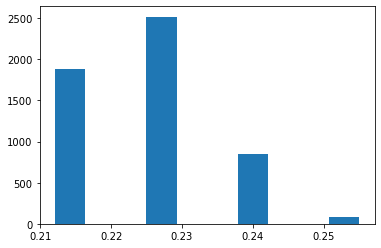

In [57]:
plt.hist(pos_prob)

Text(0, 0.5, 'Number of samples')

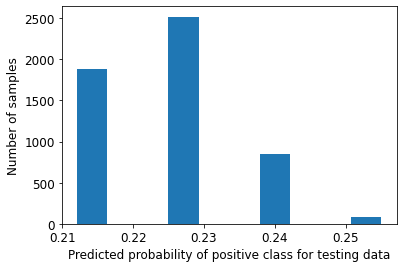

In [58]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_prob)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [59]:
pos_sample_pos_proba = pos_prob[y_test==1]
neg_sample_pos_proba = pos_prob[y_test==0]

Text(0, 0.5, 'Number of samples')

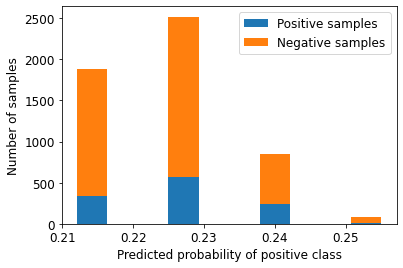

In [60]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

#### The Receiver Operating Characteristic (ROC) Curve

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pos_prob)

Text(0.5, 1.0, 'ROC curve')

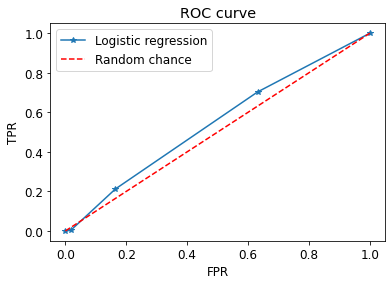

In [62]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [63]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [65]:
metrics.roc_auc_score(y_test, pos_prob)

0.5434650477972642

Precision = TP/TP+FP